In [1]:
# 忽略警告
import warnings
warnings.filterwarnings('ignore')
 
# 导入数据处理包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
# 导入绘图包
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})
# 解决保存图像时符号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False
 
from scipy import stats
from scipy.stats import norm, skew
# 导入数据
# 训练数据集
train = pd.read_csv('G:/机器学习课设/Kaggle数据/house-prices-advanced-regression-techniques/train.csv')
# 测试数据集
test = pd.read_csv('G:/机器学习课设/Kaggle数据/house-prices-advanced-regression-techniques/test.csv')
print('训练数据集：',train.shape,'测试数据集',test.shape)
# 记住训练数据和测试数据的大小，便于后续分析
train_shape = train.shape[0]
test_shape = test.shape[0]

训练数据集： (1460, 81) 测试数据集 (1459, 80)


In [2]:
# 查看前5行数据
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# 查看统计信息
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
# 目标值简单分析
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


 mu = 180921.20 
 sigma = 79415.29 



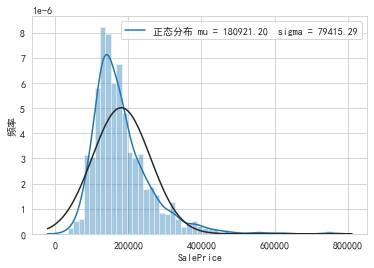

In [5]:
# 使用Seaborn自带的distplot()函数实现用分布曲线拟合目标的分布
sns.distplot(train['SalePrice'],fit= norm)
 
'''
为了更好的拟合曲线，首先对目标列进行拟合正态分布，得到最接近真实数据的标准正态分布曲线。
然后使用PP图将理论的正态分布图和实际的分布图作对比，看看真实分布能不能视作正态分布
'''
# 得到最接近真实分布的正态分布的参数：mu——期望；sigma——标准差
(mu,sigma) = norm.fit(train['SalePrice'])
print('\n mu = {:.2f} \n sigma = {:.2f} \n'.format(mu,sigma))
# 对图像参数指定
plt.legend(['正态分布 mu = {:.2f}  sigma = {:.2f}'.format(mu,sigma)], loc = 'best')
plt.ylabel('频率')
plt.xlabel('SalePrice')
plt.show()

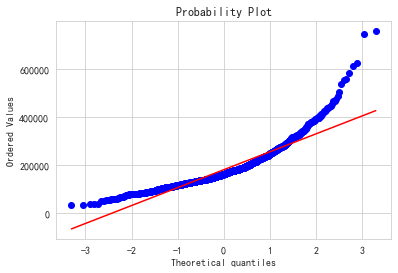

In [6]:
# 绘制PP图，观察目标分布与理论正态分布的区别
fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot = plt)
plt.show()

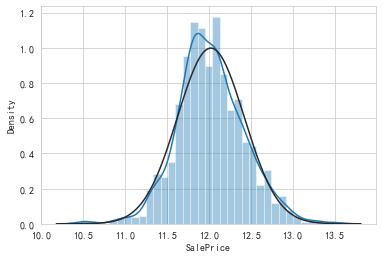

In [7]:
# 使用numpy进行对数运算
train['SalePrice'] = np.log1p(train['SalePrice'])
 
# 查看新的结果分布
sns.distplot(train['SalePrice'],fit = norm)
plt.show()

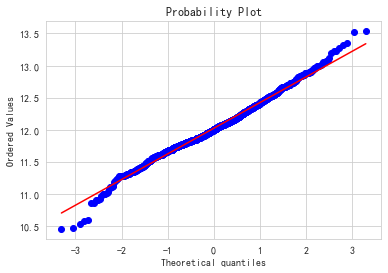

In [8]:
# 再次查看PP图
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [9]:
# 缺失值情况
# 合并数据集，方便数据清洗
full = train.append(test,ignore_index = True)
full.shape

(2919, 81)

In [10]:
# 判定是否有缺失值
full_null = full.isnull()
# 计算每列缺失值数量
full_null = full_null.sum()
# 挑选有缺失的列
full_null= full_null[full_null > 0]
full_null.sort_values(inplace = True)
full_null.shape

(35,)

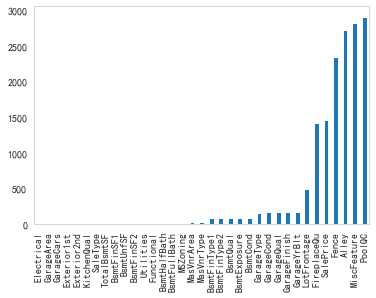

In [11]:
# 可视化缺失值
full_null.plot.bar(grid = False)
plt.show()

In [12]:
'''
Alley: Type of alley access to property
        小道的路面类型
       NA  No alley access
BsmtQual: Evaluates the height of the basement
        地下室高度
       NA   No Basement
BsmtCond: Evaluates the general condition of the basement
        地下室总体情况
       NA   No Basement
BsmtExposure: Refers to walkout or garden level walls
        地下室出口或者花园层的墙面
       NA   No Basement
BsmtFinType1: Rating of basement finished area
        地下室区域质量
       NA   No Basement
BsmtFinType2: Rating of basement finished area (if multiple types)
        二次完工面积质量(如果有)
       NA   No Basement
FireplaceQu: Fireplace quality
        壁炉质量
       NA   No Fireplace
GarageType: Garage location
        车库位置
       NA   No Garage
GarageFinish: Interior finish of the garage
        车库中间建成时间(比如翻修)
       NA   No Garage
GarageQual: Garage quality
        车库质量
       NA   No Garage
GarageCond: Garage condition
        车库条件
       NA   No Garage
PoolQC: Pool quality
        游泳池质量
       NA   No Pool
Fence: Fence quality
        围栏质量
       NA   No Fence
MiscFeature: Miscellaneous feature not covered in other categories
        其他条件中未包含部分的特性
       NA   None
       对于这些列，将NA填充为None
'''
cols = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'
        ,'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC',
        'Fence','MiscFeature']
for i in cols:
    full[i] = full[i].fillna('None')

In [13]:
# 查看填充后的情况
full_null = full.isnull()
# 计算每列缺失值数量
full_null = full_null.sum()
# 挑选有缺失的列
full_null= full_null[full_null > 0]
full_null.sort_values(inplace = True)
print(full_null.shape)
full_null

(21,)


TotalBsmtSF        1
GarageArea         1
Exterior1st        1
Exterior2nd        1
GarageCars         1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
SaleType           1
Electrical         1
KitchenQual        1
Utilities          2
Functional         2
BsmtFullBath       2
BsmtHalfBath       2
MSZoning           4
MasVnrArea        23
MasVnrType        24
GarageYrBlt      159
LotFrontage      486
SalePrice       1459
dtype: int64

In [14]:
'''
1. LotFrontage：Linear feet of street connected to property
表示房子同街道之间的距离，居住在一起的人LotFrontage是相似的，可以将邻居的LotFrontage填充进来；
'''
full['LotFrontage'] = full.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))
 
'''
2. GarageYrBlt：Year garage was built
   GarageArea：Size of garage in square feet
   GarageCars：Size of garage in car capacity
分别表示车库的建造年份面积，车位大小以停车数量表示，这个值缺失很可能表示没有车库，用0填充；
GarageArea 
'''
full['GarageYrBlt'] = full['GarageYrBlt'].fillna(0)
full['GarageArea'] = full['GarageArea'].fillna(0)
full['GarageCars'] = full['GarageCars'].fillna(0)
'''
3. MasVnrType：Masonry veneer type
表示装饰石材类型。缺失值用None替代就可以了；
4. MasVnrArea：Masonry veneer area in square feet
表示墙面砖的大小，对缺失值用0替代；
'''
full['MasVnrType'] = full['MasVnrType'].fillna('None')
full['MasVnrArea'] = full['MasVnrArea'].fillna(0)
'''
5. MSZoning：Identifies the general zoning classification of the sale.
表示出售的房屋空间的分区分级，使用最常出现的值代替；
'''
full['MSZoning'] = full['MSZoning'].fillna(full['MSZoning'].mode()[0])

In [15]:
'''6. Utilities：Type of utilities available
表示房子里提供的水电设施，空值可能表示没有任何水电气设施；
'''
full['Utilities'] = full['Utilities'].fillna('none')
'''
BsmtFullBath:Basement full bathrooms
BsmtHalfBath :Basement half bathrooms
表示地下室全部作为浴室还是一半作为浴室，缺失值可能是因为无地下室，用0填充
'''
full['BsmtFullBath'] = full['BsmtFullBath'].fillna(0)
full['BsmtHalfBath'] = full['BsmtHalfBath'].fillna(0)
'''
Functional: Home functionality
表示房子的功能性评级，NA表示typical
'''
full['Functional'] = full['Functional'].fillna('Typ')
'''
Exterior1st:房子外立面材料，填充为最常见的值
'''
full['Functional'] = full['Functional'].fillna('Typ')
'''
BsmtUnfSF:Unfinished square feet of basement area
BsmtFinSF2:Type 2 finished square feet
BsmtFinSF1: Type 1 finished square feet 
TotalBsmtSF: Total square feet of basement area
表示地下室某种面积，直接填充0.
'''
full['BsmtUnfSF'] = full['BsmtUnfSF'].fillna(0)
full['BsmtFinSF2'] = full['BsmtFinSF2'].fillna(0)
full['BsmtFinSF1'] = full['BsmtFinSF1'].fillna(0)
full['TotalBsmtSF'] = full['TotalBsmtSF'].fillna(0)

In [16]:
'''
对于SaleType，解释如下：
SaleType: Type of sale
        出售类型
       WD   Warranty Deed - Conventional
       CWD  Warranty Deed - Cash
       VWD  Warranty Deed - VA Loan
       New  Home just constructed and sold
       COD  Court Officer Deed/Estate
       Con  Contract 15% Down payment regular terms
       ConLw  Contract Low Down payment and low interest
       ConL   Contract Low Interest
       ConLD  Contract Low Down
       Oth  Other
KitchenQual: Kitchen quality
        厨房质量
       Ex   Excellent
       Gd   Good
       TA   Typical/Average
       Fa   Fair
       Po   Poor
直接填充出现的最多的值
'''
full['SaleType'].head()

0    WD
1    WD
2    WD
3    WD
4    WD
Name: SaleType, dtype: object

In [17]:
full['SaleType'] = full['SaleType'].fillna(full['SaleType'].mode()[0])
full['KitchenQual'] = full['KitchenQual'].fillna(full['KitchenQual'].mode()[0])
full['Electrical'].head()

0    SBrkr
1    SBrkr
2    SBrkr
3    SBrkr
4    SBrkr
Name: Electrical, dtype: object

In [18]:
full['Electrical'] = full['Electrical'].fillna(full['Electrical'].mode()[0])
full['Exterior1st'] = full['Exterior1st'].fillna(0)
full['Exterior2nd'] = full['Exterior2nd'].fillna(0)
full_null = full.isnull().sum()
full_null.head()

Id             0
MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
dtype: int64

In [19]:
full_null = full_null.drop(full_null[full_null == 0].index)
full_null

SalePrice    1459
dtype: int64

In [20]:
# 分离出训练数据
train_anal = full.loc[:train_shape-1][:]
print(train_anal.shape)

# 分离出测试数据
test_anal = full.loc[:test_shape-1:][:]
print(test_anal.shape)
# 选择出数值型数据
train_anal_numcol = list(train_anal.select_dtypes(include = ['number']).columns)
# 移除Id和SalePrice
train_anal_numcol.remove('Id')
train_anal_numcol.remove('SalePrice')
# 使用melt()函数将二维表转化为一维连续表格，并画出其分布图
train_anal_num_plot = pd.melt(train_anal,value_vars = train_anal_numcol)
train_anal_num_plot.head()

(1460, 81)
(1459, 81)


,variable,value
0,MSSubClass,60.0
1,MSSubClass,20.0
2,MSSubClass,60.0
3,MSSubClass,70.0
4,MSSubClass,60.0


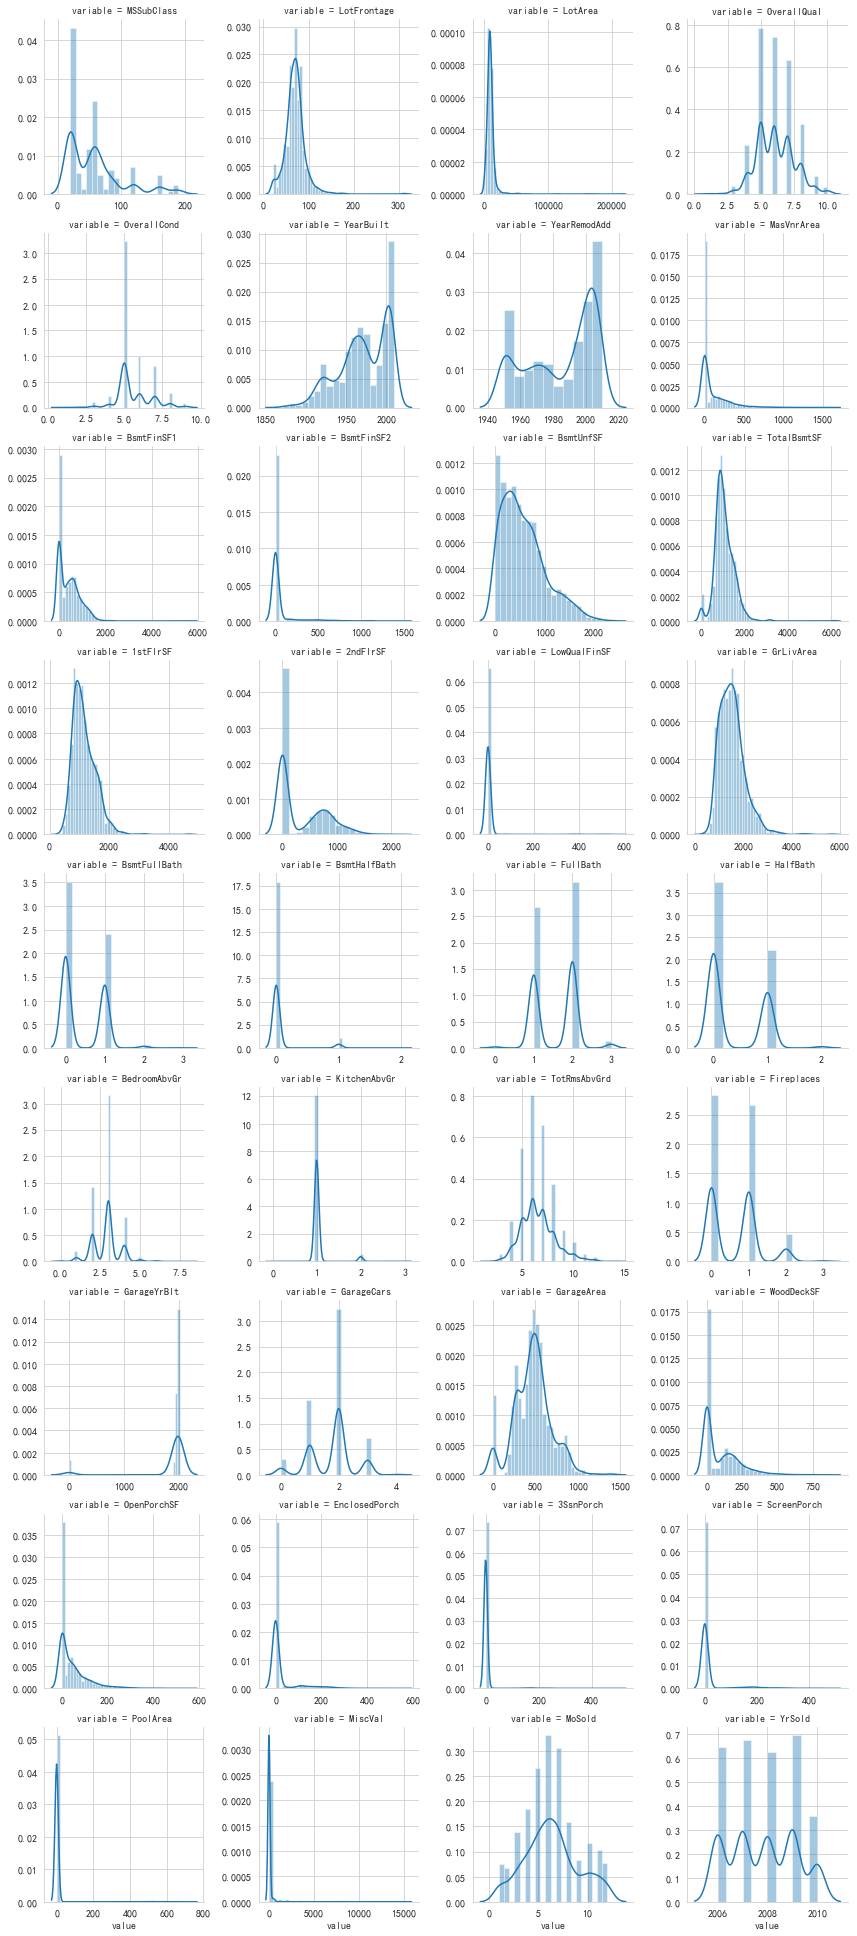

In [21]:
# 使用seaborn的FacetGrid()函数可以做出此类数据的分布和拟合曲线
plot = sns.FacetGrid(train_anal_num_plot,col = 'variable',col_wrap = 4,sharex = False,sharey = False)
show_plot = plot.map(sns.distplot,'value')
plt.show()

In [22]:
# 转化为str类型
col_into_str = ['GarageYrBlt','MSSubClass','MoSold','YrSold','OverallCond','OverallQual']
for i in col_into_str:
    train_anal[i] = train_anal[i].astype(str)
    test_anal[i] = test_anal[i].astype(str)

In [23]:
# 选择出obj类型数据
train_anal_objcol = list(train_anal.select_dtypes(include = ['object']).columns)
# 将obj转化为category类型
for i in train_anal_objcol:
    train_anal[i] = train_anal[i].astype('category')

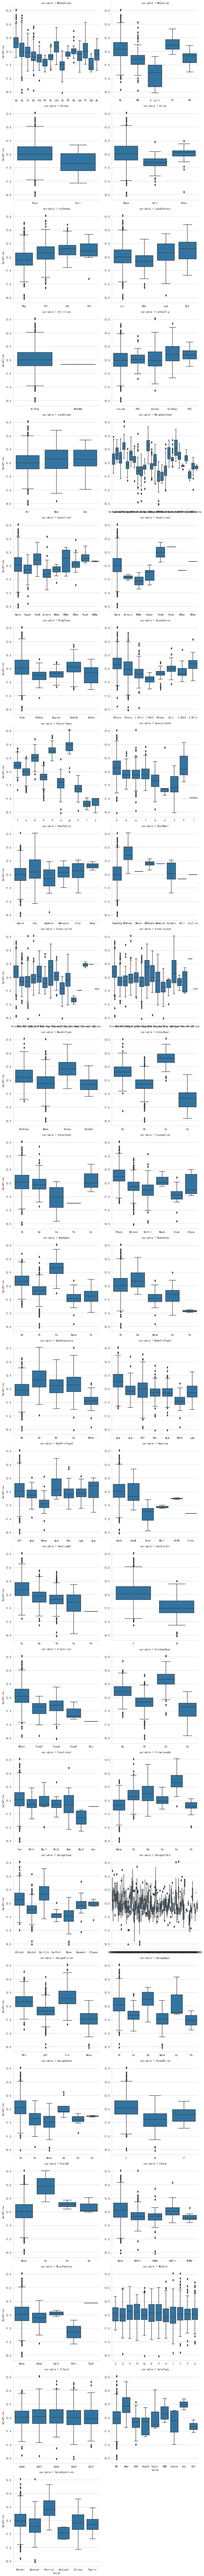

In [24]:
# 使用melt()函数转化为一维数据，在一张图中展示出来，方便比较
train_anal_obj_plot = pd.melt(train_anal,id_vars = ['SalePrice'],
                              value_vars = train_anal_objcol)
# 绘制箱形图
train_anal_obj_plot_box = sns.FacetGrid(train_anal_obj_plot,col = 'variable',
                                      col_wrap = 2,
                                      sharex = False,sharey = False,
                                      size = 5
                                       )
train_anal_obj_plot_box
train_anal_obj_plot_box = train_anal_obj_plot_box.map(sns.boxplot,'value','SalePrice')
plt.show()

In [25]:
# 选择以下列进行编码,并作为特征
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
cols = list(cols)
full[cols].head()

,FireplaceQu,BsmtQual,BsmtCond,GarageQual,GarageCond,ExterQual,ExterCond,HeatingQC,PoolQC,KitchenQual,...,LandSlope,LotShape,PavedDrive,Street,Alley,CentralAir,MSSubClass,OverallCond,YrSold,MoSold
0,None,Gd,TA,TA,TA,Gd,TA,Ex,None,Gd,...,Gtl,Reg,Y,Pave,None,Y,60,5,2008,2
1,TA,Gd,TA,TA,TA,TA,TA,Ex,None,TA,...,Gtl,Reg,Y,Pave,None,Y,20,8,2007,5
2,TA,Gd,TA,TA,TA,Gd,TA,Ex,None,Gd,...,Gtl,IR1,Y,Pave,None,Y,60,5,2008,9
3,Gd,TA,Gd,TA,TA,TA,TA,Gd,None,Gd,...,Gtl,IR1,Y,Pave,None,Y,70,5,2006,2
4,TA,Gd,TA,TA,TA,Gd,TA,Ex,None,Gd,...,Gtl,IR1,Y,Pave,None,Y,60,5,2008,12


In [26]:
# 导入lable_encolder包
from sklearn.preprocessing import LabelEncoder
# 使用循环,编码所选列
for i in cols:
    le = LabelEncoder()
    le.fit(list(full[i].values))
    full[i] = le.transform(full[i].values)
full[cols].head()

,FireplaceQu,BsmtQual,BsmtCond,GarageQual,GarageCond,ExterQual,ExterCond,HeatingQC,PoolQC,KitchenQual,...,LandSlope,LotShape,PavedDrive,Street,Alley,CentralAir,MSSubClass,OverallCond,YrSold,MoSold
0,3,2,4,5,5,2,4,0,3,2,...,0,3,2,1,1,1,5,4,2,1
1,5,2,4,5,5,3,4,0,3,3,...,0,3,2,1,1,1,0,7,1,4
2,5,2,4,5,5,2,4,0,3,2,...,0,0,2,1,1,1,5,4,2,8
3,2,4,1,5,5,3,4,2,3,2,...,0,0,2,1,1,1,6,4,0,1
4,5,2,4,5,5,2,4,0,3,2,...,0,0,2,1,1,1,5,4,2,11


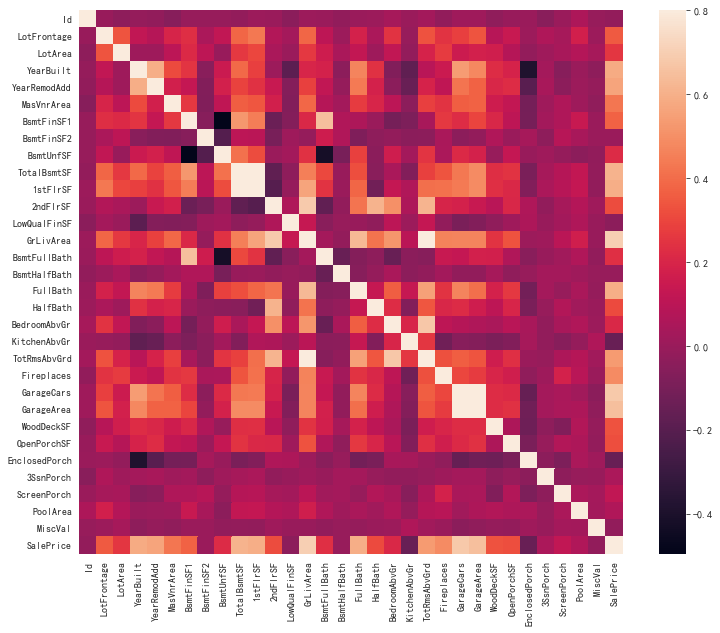

In [27]:
# 绘制热力图,观察各列相关性大小
corr = train_anal.corr()
f = plt.subplots(figsize = (13,10))
sns.heatmap(corr,vmax = 0.8,square = True)
plt.show()

In [28]:
corr['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.426776
BsmtFinSF1       0.372023
LotFrontage      0.351234
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
LowQualFinSF    -0.037963
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64

(1460, 81)


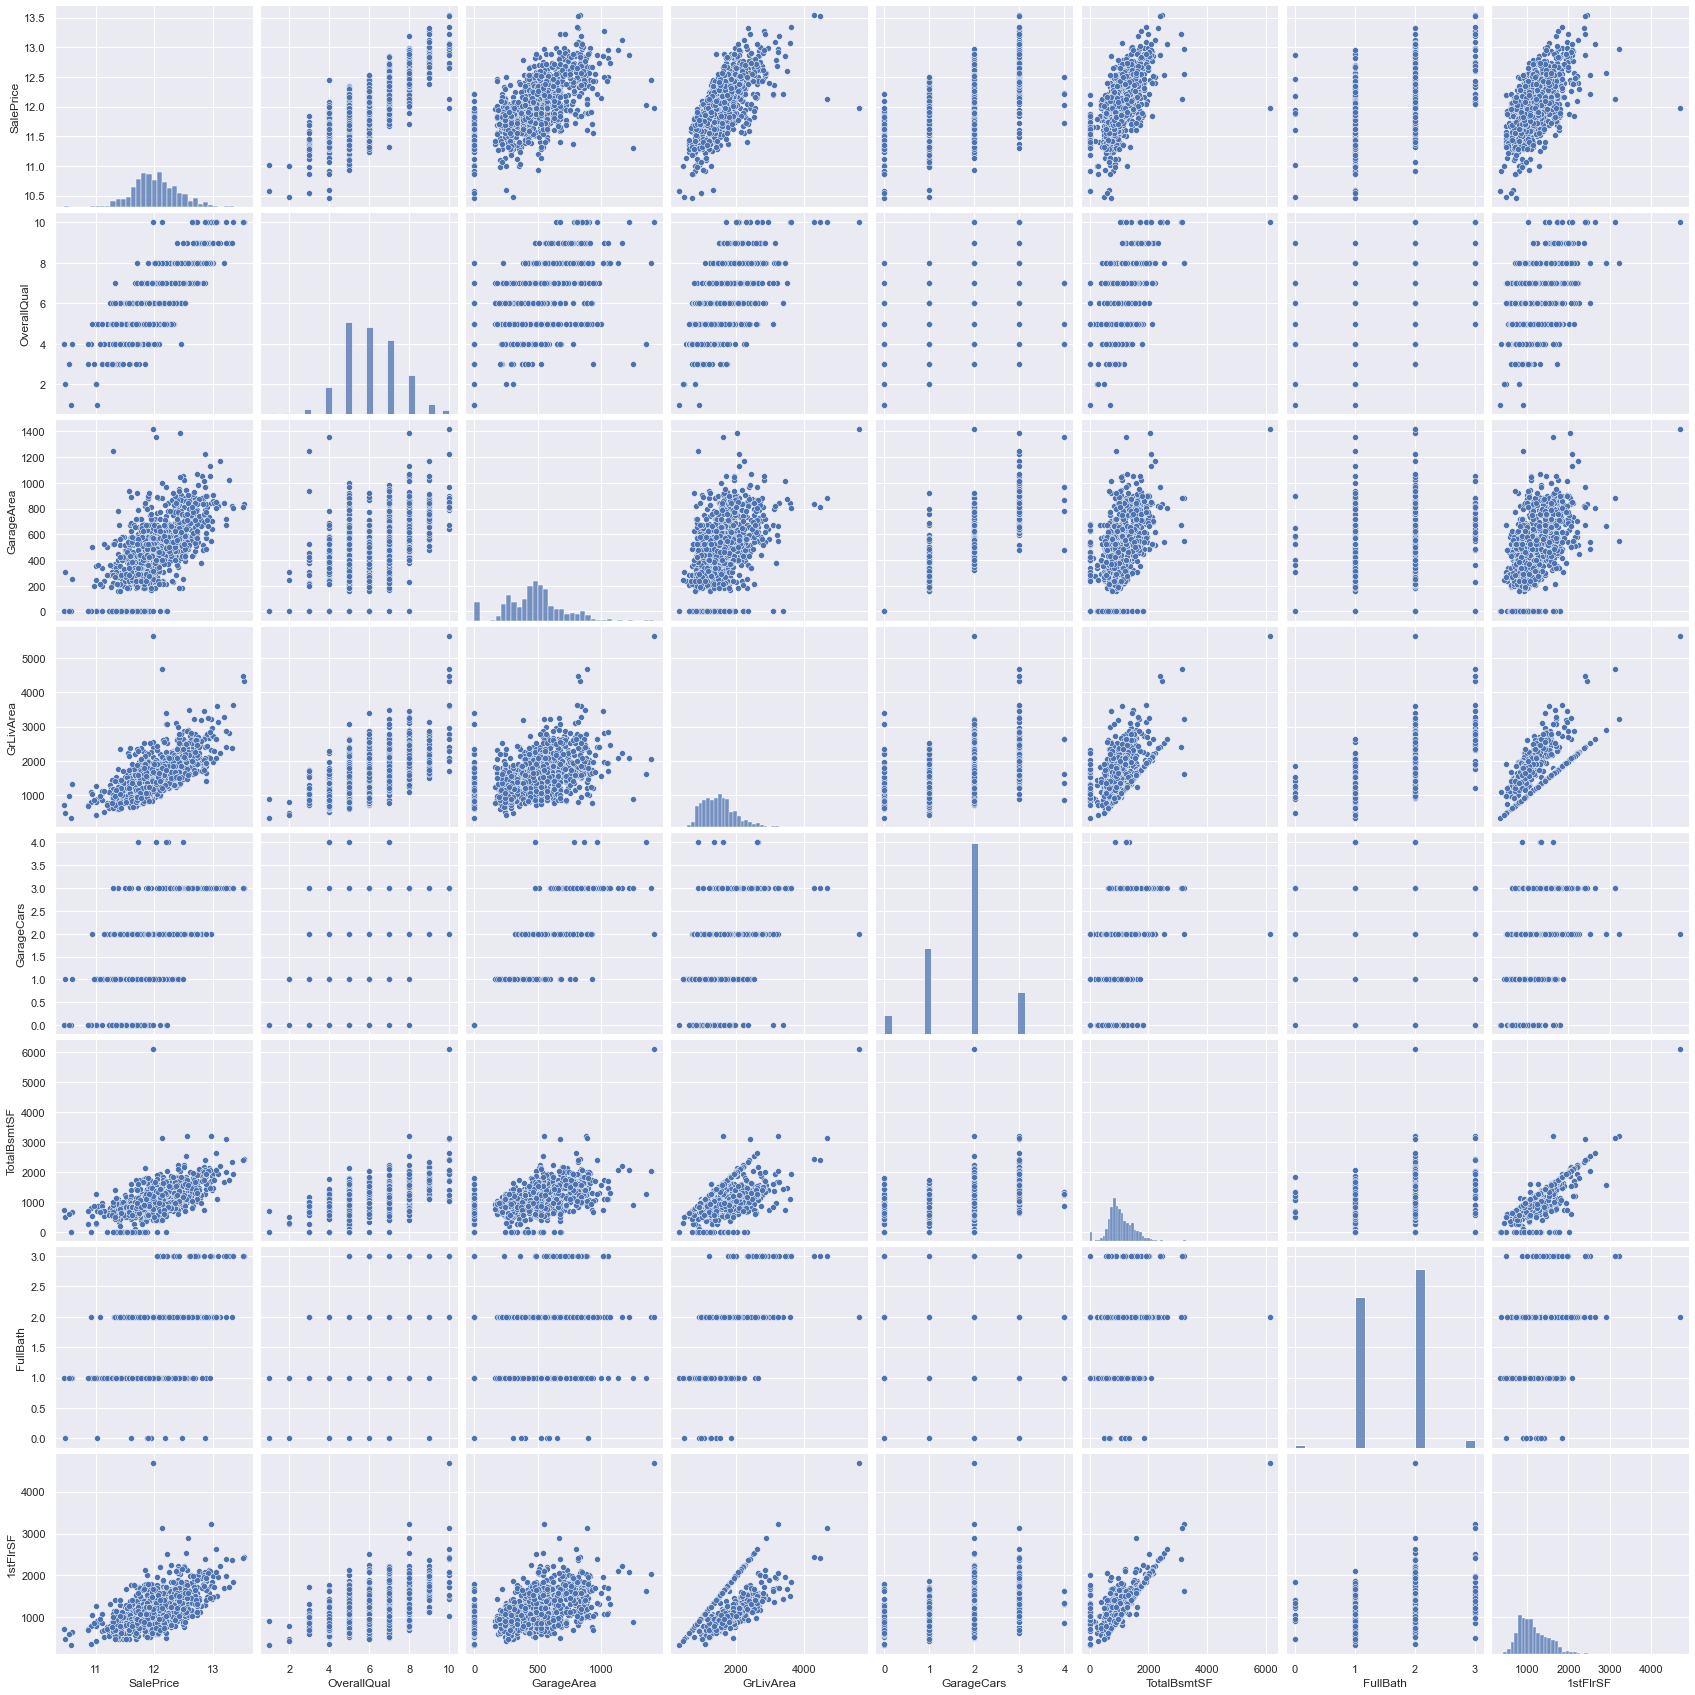

In [29]:
# 绘制散点图,观察相关性较大的列和目标值的分布,找出异常值
sns.set()
col_scatterplot = ['SalePrice', 'OverallQual', 'GarageArea','GrLivArea', 'GarageCars', 'TotalBsmtSF',
                   'FullBath','1stFlrSF']
scatter_train = full.loc[:train_shape-1][:]
print(train_anal.shape)
sns.pairplot(scatter_train[col_scatterplot],size = 3)
plt.show()

In [30]:
# 删除GrLivArea、FullBath、1stFlrSF的异常值
full = full.drop(full[(full['GrLivArea']>4000) & (full['SalePrice']<12.5)].index)
full.shape

(2917, 81)

In [31]:
full = full.drop(full[(full['TotalBsmtSF']>4000) & (full['SalePrice']<12.5)].index)
full = full.drop(full[(full['1stFlrSF']>4000) & (full['SalePrice']<12.5)].index)
full.shape

(2917, 81)

In [32]:
# 选择出数值类数据
full_num_col = full.dtypes[full.dtypes != 'object'].index
full_num_col

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object')

In [33]:
# 计算每列偏离度
skewed = full[full_num_col].apply(lambda x:skew(x.dropna())).sort_values(ascending = False)
skewed = pd.DataFrame(skewed)
skewed

,0
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [34]:
# 去除分析的目标SalePrice
skewed = skewed.drop(['SalePrice'])
skewed = skewed.drop(['Id'])
  
# 选择出偏离值绝对值大于0.75的列进行转化
skewed = skewed[abs(skewed) > 0.75]
 
#导入boxcox计算包
from scipy.special import boxcox1p

In [35]:
# 使用boxcox1p函数,制定lam参数为0.15
skewed_col = list(skewed.index)
lam = 0.15
for i in skewed_col:
    full[i] = boxcox1p(full[i],lam)

In [36]:
# 选取数值型特征
col_num = corr['SalePrice'].sort_values(ascending = False)
col_num_highcorr = col_num[col_num > 0.3]
col_num_highcorr = list(col_num_highcorr.index)
col_num_highcorr.remove('SalePrice')
col_num_highcorr = full[col_num_highcorr]
col_num_highcorr.head()

,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd,Fireplaces,MasVnrArea,BsmtFinSF1,LotFrontage,WoodDeckSF,OpenPorchSF,2ndFlrSF,HalfBath
0,13.698888,1.194318,10.506271,11.692623,11.692623,1.194318,14.187527,14.187527,2.602594,0.000000,8.059126,11.170327,5.831328,0.000000,5.714669,11.686189,0.730463
1,12.792276,1.194318,10.062098,12.792276,12.792276,1.194318,14.145138,14.145138,2.259674,0.730463,0.000000,12.062832,6.221214,9.010206,0.000000,0.000000,0.000000
2,13.832085,1.194318,10.775536,11.892039,11.892039,1.194318,14.184404,14.185966,2.259674,0.730463,7.646538,10.200343,5.914940,0.000000,5.053371,11.724598,0.730463
3,13.711364,1.540963,10.918253,11.354094,12.013683,0.730463,14.047529,14.135652,2.440268,0.730463,0.000000,8.274266,5.684507,0.000000,4.745132,11.354094,0.000000
4,14.480029,1.540963,11.627708,12.510588,12.510588,1.194318,14.182841,14.182841,2.750250,0.730463,9.391827,10.971129,6.314735,8.013884,6.314735,12.271365,0.730463


In [37]:
col_num_highcorr.shape

(2917, 17)

In [38]:
#选择分类型数值
cat_cols = full[cols]
cat_cols.shape

(2917, 26)

In [39]:
full_X = pd.concat([col_num_highcorr,cat_cols],axis = 1)
full_X.head()

,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd,Fireplaces,...,LandSlope,LotShape,PavedDrive,Street,Alley,CentralAir,MSSubClass,OverallCond,YrSold,MoSold
0,13.698888,1.194318,10.506271,11.692623,11.692623,1.194318,14.187527,14.187527,2.602594,0.000000,...,0.0,1.540963,1.194318,0.730463,0.730463,0.730463,2.055642,1.820334,1.194318,0.730463
1,12.792276,1.194318,10.062098,12.792276,12.792276,1.194318,14.145138,14.145138,2.259674,0.730463,...,0.0,1.540963,1.194318,0.730463,0.730463,0.730463,0.000000,2.440268,0.730463,1.820334
2,13.832085,1.194318,10.775536,11.892039,11.892039,1.194318,14.184404,14.185966,2.259674,0.730463,...,0.0,0.000000,1.194318,0.730463,0.730463,0.730463,2.055642,1.820334,1.194318,2.602594
3,13.711364,1.540963,10.918253,11.354094,12.013683,0.730463,14.047529,14.135652,2.440268,0.730463,...,0.0,0.000000,1.194318,0.730463,0.730463,0.730463,2.259674,1.820334,0.000000,0.730463
4,14.480029,1.540963,11.627708,12.510588,12.510588,1.194318,14.182841,14.182841,2.750250,0.730463,...,0.0,0.000000,1.194318,0.730463,0.730463,0.730463,2.055642,1.820334,1.194318,3.011340


In [40]:
full_X.shape

(2917, 43)

In [41]:
# 将所有分类型变量进行编码
full_X = pd.get_dummies(full_X)
print(full_X.shape)
full_X.head()

(2917, 43)


,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd,Fireplaces,...,LandSlope,LotShape,PavedDrive,Street,Alley,CentralAir,MSSubClass,OverallCond,YrSold,MoSold
0,13.698888,1.194318,10.506271,11.692623,11.692623,1.194318,14.187527,14.187527,2.602594,0.000000,...,0.0,1.540963,1.194318,0.730463,0.730463,0.730463,2.055642,1.820334,1.194318,0.730463
1,12.792276,1.194318,10.062098,12.792276,12.792276,1.194318,14.145138,14.145138,2.259674,0.730463,...,0.0,1.540963,1.194318,0.730463,0.730463,0.730463,0.000000,2.440268,0.730463,1.820334
2,13.832085,1.194318,10.775536,11.892039,11.892039,1.194318,14.184404,14.185966,2.259674,0.730463,...,0.0,0.000000,1.194318,0.730463,0.730463,0.730463,2.055642,1.820334,1.194318,2.602594
3,13.711364,1.540963,10.918253,11.354094,12.013683,0.730463,14.047529,14.135652,2.440268,0.730463,...,0.0,0.000000,1.194318,0.730463,0.730463,0.730463,2.259674,1.820334,0.000000,0.730463
4,14.480029,1.540963,11.627708,12.510588,12.510588,1.194318,14.182841,14.182841,2.750250,0.730463,...,0.0,0.000000,1.194318,0.730463,0.730463,0.730463,2.055642,1.820334,1.194318,3.011340


In [42]:
full = pd.get_dummies(full)
full.shape

(2917, 226)

In [43]:
full.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,2.055642,5.831328,19.212182,0.730463,0.730463,1.540963,0.0,2.440268,1.820334,...,0,0,0,1,0,0,0,0,1,0
1,2,0.000000,6.221214,19.712205,0.730463,0.730463,1.540963,0.0,2.259674,2.440268,...,0,0,0,1,0,0,0,0,1,0
2,3,2.055642,5.914940,20.347241,0.730463,0.730463,0.000000,0.0,2.440268,1.820334,...,0,0,0,1,0,0,0,0,1,0
3,4,2.259674,5.684507,19.691553,0.730463,0.730463,0.000000,0.0,2.440268,1.820334,...,0,0,0,1,1,0,0,0,0,0
4,5,2.055642,6.314735,21.325160,0.730463,0.730463,0.000000,0.0,2.602594,1.820334,...,0,0,0,1,0,0,0,0,1,0


In [44]:
# 分离出训练数据和测试数据
# 由于之前删除了2条记录，所以分离数据需要多减去2条
train = full[0:train_shape-1-2][:]
test = full[test_shape-1-2:][:]
train_shape

1460

In [45]:
'''
将原始的训练数据集前面加source加以区分，在原始数据集中拆分出训练数据和测试数据
原始数据有1460条记录
'''
# 原始数据集特征
source_X = full_X.loc[0:train_shape-1,:]
# 原始数据集标签
source_y = full.loc[0:train_shape-1,'SalePrice']
 
# 预测数据集特征
pred_X = full_X.loc[train_shape:,:]
# 检查分割是否正确
print('souce_X shape:',source_X.shape[0])
print('pred_X shape:',pred_X.shape[0])

souce_X shape: 1458
pred_X shape: 1459


In [46]:
'''
从原始数据集（source）中拆分出训练数据集（用于模型训练train），测试数据集（用于模型评估test）
train_test_split是交叉验证中常用的函数，功能是从样本中随机的按比例选取train data和test data
train_data：所要划分的样本特征集
train_target：所要划分的样本结果
test_size：样本占比，如果是整数的话就是样本的数量
'''
from sklearn.model_selection import train_test_split
 
train_X,test_X,train_y,test_y = train_test_split(source_X,source_y,train_size = 0.8)
 
# 输出数据集大小
print ('原始数据集特征：',source_X.shape, 
       '\n训练数据集特征：',train_X.shape ,
      '\n测试数据集特征：',test_X.shape)
 
print ('\n原始数据集标签：',source_y.shape, 
       '\n训练数据集标签：',train_y.shape ,
      '\n测试数据集标签：',test_y.shape)

原始数据集特征： (1458, 43) 
训练数据集特征： (1166, 43) 
测试数据集特征： (292, 43)

原始数据集标签： (1458,) 
训练数据集标签： (1166,) 
测试数据集标签： (292,)


In [47]:
# 线性回归模型
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()

In [48]:
# LassoCV模型
from sklearn.linear_model import LassoCV
model_LassoCV = LassoCV(alphas = [1,0.1,0.001,0.005])

In [49]:
# 1.逻辑回归模型：
model_linear.fit(train_X,train_y)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
# 2.LassoCV模型：
model_LassoCV.fit(train_X,train_y)
LassoCV(alphas=[1, 0.1, 0.001, 0.005], copy_X=True, cv=None, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

LassoCV(alphas=[1, 0.1, 0.001, 0.005], n_jobs=1)

In [50]:
# 导入cross_val_score（）函数
from sklearn.model_selection import  KFold,cross_val_score

In [51]:
# 定义评估函数
n_folds = 5
 
def resle_cv(model):
    kf = KFold(n_folds,shuffle = True,random_state = 42).get_n_splits(source_X,source_y)
    rmse = np.sqrt(-cross_val_score(model,source_X,source_y,
                                    scoring='neg_mean_squared_error',
                                   cv = kf))
    return (rmse)

In [52]:
# model_linear评估
score_model_linear = resle_cv(model_linear)
score_model_linear = [score_model_linear.mean(),score_model_linear.std()]
score_model_linear

[0.13693449571925725, 0.009052560188802796]

In [53]:
# model_LassoCV评估
score_model_LassoCV = resle_cv(model_LassoCV)
score_model_LassoCV  = [score_model_LassoCV.mean(),score_model_LassoCV.std()]
score_model_LassoCV

[0.1412944223135859, 0.008922775037547856]

In [54]:
# 使用机器学习模型预测
pred_li = model_linear.predict(pred_X)
pred_Y = model_LassoCV.predict(pred_X)
#Id
Id = full.loc[train_shape:,'Id']

In [55]:
pred_li = np.exp(pred_li)
pred_Y = np.exp(pred_Y)
# 生成结果数据框
predDf = pd.DataFrame(
            {'Id':Id,
            'SalePrice':pred_Y*0.3 + pred_li*0.7}
)
predDf.shape
predDf.head()

,Id,SalePrice
1460,1461,116366.380692
1461,1462,154500.577081
1462,1463,194559.773263
1463,1464,210006.963916
1464,1465,166306.291339


In [56]:
# 保存结果
predDf.to_csv('G:\机器学习课设\Kaggle数据\houseprice_Predict_li7CV3.csv',index = False)